In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
pastel_colors = [
    '#c4291c',
    '#8b8888',
    '#7b86c6',
    '#5db47d',
    '#4499df',
    '#4599df',
    '#397e49',
    '#832da4',
    '#e25d33',
    '#d98077',
    '#edc04c'
]

In [10]:
csv_file = '../data/ind_niftytotalmarket_list.csv'

In [11]:
df = pd.read_csv(csv_file)

In [12]:
df

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AGI Greenpac Ltd.,Capital Goods,AGI,EQ,INE415A01038
...,...,...,...,...,...
746,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
747,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027
748,Zydus Wellness Ltd.,Fast Moving Consumer Goods,ZYDUSWELL,EQ,INE768C01010
749,eClerx Services Ltd.,Services,ECLERX,EQ,INE738I01010


In [13]:
pf = {'TCS.NS':0.33, 'TATAMOTORS.NS': 0.33, 'ABB.NS':0.33, 'AGI.NS': 0.33}

In [14]:
pf_industry = {}
for stock, weight in pf.items():
    symbol = stock[:-3]
    industry = df[df['Symbol']==symbol]['Industry'].iloc[0]
    pf_industry[stock] = industry

In [15]:
pf_industry

{'TCS.NS': 'Information Technology',
 'TATAMOTORS.NS': 'Automobile and Auto Components',
 'ABB.NS': 'Capital Goods',
 'AGI.NS': 'Capital Goods'}

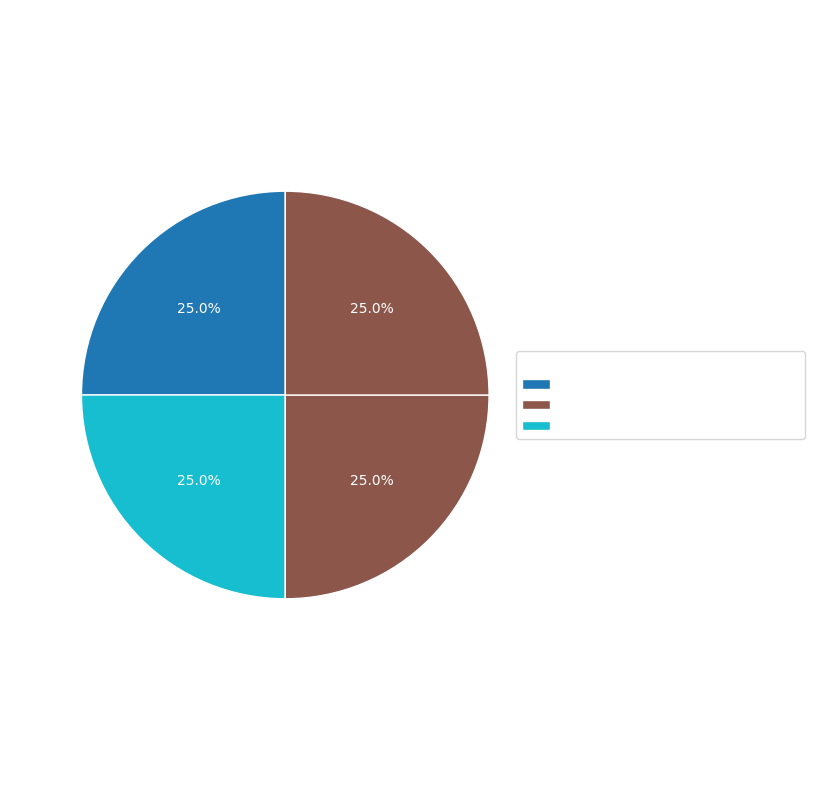

In [16]:
total_weight = sum(pf.values())
adjusted_pf = {symbol: weight / total_weight for symbol, weight in pf.items()}

labels = [f"{symbol}\n({adjusted_pf[symbol]*100:.1f}%)" for symbol in adjusted_pf.keys()]
sizes = [weight for weight in adjusted_pf.values()]

industries = list(set(pf_industry.values()))
colors = plt.cm.get_cmap('tab10', len(industries))
industry_colors = {industry: colors(i) for i, industry in enumerate(industries)}
pie_colors = [industry_colors[pf_industry[symbol]] for symbol in adjusted_pf.keys()]

fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=pie_colors, wedgeprops=dict(edgecolor='white'), textprops={'color': 'white'})

legend_elements = [Patch(facecolor=industry_colors[industry], edgecolor='white', label=industry) for industry in set(pf_industry.values())]
legend = ax.legend(handles=legend_elements, title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=True, facecolor='none')
plt.setp(legend.get_texts(), color='white')
plt.setp(legend.get_title(), color='white')

ax.axis('equal')
plt.tight_layout()
plt.savefig('portfolio_pie_chart.png', bbox_inches='tight', transparent=True)